In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import os
from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

#mpl('font', family='AppleGothic')
#plt.rcParams['axes.unicode_minus'] = False #Apple
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [2]:
# 데이터 불러오기
save_dir = os.path.abspath("/img")
os.makedirs(save_dir, exist_ok=True)
marketing = pd.read_csv('marketing_advanced.csv', encoding='cp949')

In [3]:
def check_df(dataframe):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.info())
    print("##################### Describe #####################")
    print(dataframe.describe(include='all'))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

In [4]:
def uni_df(dataframe):
    for col in dataframe:
        print(col,dataframe[col].unique())
        print(col,dataframe[col].nunique())

In [5]:
check_df(marketing)

##################### Shape #####################
(104899, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       104899 non-null  object 
 1   customer_id                    104899 non-null  object 
 2   order_status                   104899 non-null  object 
 3   order_purchase_timestamp       104899 non-null  object 
 4   order_approved_at              104899 non-null  object 
 5   order_delivered_timestamp      102623 non-null  object 
 6   order_estimated_delivery_date  104899 non-null  object 
 7   age                            104899 non-null  int64  
 8   gender                         104899 non-null  object 
 9   country                        104899 non-null  object 
 10  payment_type                   104899 n

In [6]:
marketing.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,age,gender,country,payment_type,payment_installments,seller_id,shipping_charges,category1,category2,price,delivery_delay_days,approval_delay_minutes,weight_kg,volume_cm3,review_score,marketing_info_agree,agegroup,product_id
0,e22acc9c116caa3f2b7121bbb380d08e,0000366f3b9a7992bf8c76cfdf3221e2,delivered,2024-10-10 16:29,2024-10-10 19:21,2024-10-16 20:48,2024-10-21,56,남성,핀란드,credit_card,8,da8622b14eb17ae2831f4ac5b9dab84a,12,식품,건강식품,62.17,-5.0,15.0,5,11845.97,5,y,50대,d2e1b02d25294e6f
1,3594e05a005ac4d06a72673270ef9ec9,0000b849f77a49e4a4ce2b2a4ca5be3f,delivered,2024-10-07 17:47,2024-10-07 19:14,2024-10-10 18:02,2024-10-15,61,여성,한국,credit_card,1,138dbe45fc62f1e244378131a6801526,8,식품,건강식품,57.90,-5.0,434.0,1,25981.89,4,y,50대,d2e1b02d25294e6f
2,b33ec3b699337181488304f362a6b734,0000f46a3911fa3c0805444483337064,delivered,2023-08-10 16:35,2023-08-10 19:29,2023-09-05 14:38,2023-09-07,51,남성,필리핀,credit_card,8,3d871de0142ce09b7081e2b9d1733cb1,17,식품,건강식품,60.34,-2.0,0.0,0,26478.17,2,n,50대,d2e1b02d25294e6f
3,41272756ecddd9a9ed0180413cc22fb6,0000f6ccb0745a6a4b88665a16c9f078,delivered,2024-03-12 15:03,2024-03-12 17:00,2024-04-01 21:23,2024-04-13,34,여성,덴마크,credit_card,4,ef506c96320abeedfb894c34db06f478,17,전자제품,음향가전,128.17,-12.0,20.0,10,208064.64,4,y,30대,f9614bb192ee4050
4,d957021f1127559cd947b62533f484f7,0004aac84e0df4da2b147fca70cf8255,delivered,2024-04-14 13:49,2024-04-14 15:41,2024-04-27 23:08,2024-05-05,42,남성,벨기에,credit_card,6,70a12e78e608ac31179aea7f8422044b,16,전자제품,주방가전,110.15,-8.0,21.0,5,185186.95,2,y,40대,76a306b4cd254f91


In [7]:
# 날짜형으로 변환할 컬럼 목록
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_timestamp',
    'order_estimated_delivery_date'
]
for col in date_cols:
    marketing[col] = pd.to_datetime(marketing[col], errors='coerce')

In [8]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104899 non-null  object        
 1   customer_id                    104899 non-null  object        
 2   order_status                   104899 non-null  object        
 3   order_purchase_timestamp       104899 non-null  datetime64[ns]
 4   order_approved_at              104899 non-null  datetime64[ns]
 5   order_delivered_timestamp      102623 non-null  datetime64[ns]
 6   order_estimated_delivery_date  104899 non-null  datetime64[ns]
 7   age                            104899 non-null  int64         
 8   gender                         104899 non-null  object        
 9   country                        104899 non-null  object        
 10  payment_type                   104899 non-null  object        
 11  

In [9]:
uni_df(marketing)

order_id ['e22acc9c116caa3f2b7121bbb380d08e' '3594e05a005ac4d06a72673270ef9ec9'
 'b33ec3b699337181488304f362a6b734' ... 'fdc45e6c7555e6cb3cc0daca2557dbe1'
 '94d3ee0bc2a0af9d4fa47a4d63616e8d' 'f79a35da168301ae56922475da21117b']
order_id 98665
customer_id ['0000366f3b9a7992bf8c76cfdf3221e2' '0000b849f77a49e4a4ce2b2a4ca5be3f'
 '0000f46a3911fa3c0805444483337064' ... 'ffff371b4d645b6ecea244b27531430a'
 'ffff5962728ec6157033ef9805bacc48' 'ffffd2657e2aad2907e67c3e9daecbeb']
customer_id 95419
order_status ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'unavailable'
 'approved']
order_status 7
order_purchase_timestamp <DatetimeArray>
['2024-10-10 16:29:00', '2024-10-07 17:47:00', '2023-08-10 16:35:00', '2024-03-12 15:03:00', '2024-04-14 13:49:00', '2024-09-05 19:12:00', '2024-09-20 17:23:00', '2024-07-28 12:48:00', '2024-07-28 16:30:00', '2023-08-04 16:18:00',
 ...
 '2024-01-11 18:24:00', '2024-12-20 11:59:00', '2024-12-02 20:41:00', '2024-02-01 05:48:00', '2024-05-27 20:22:00', '202

In [10]:
# 오타 수정
marketing['category2'] = marketing['category2'].replace('낚세', '낚시')
uni_df(marketing)

order_id ['e22acc9c116caa3f2b7121bbb380d08e' '3594e05a005ac4d06a72673270ef9ec9'
 'b33ec3b699337181488304f362a6b734' ... 'fdc45e6c7555e6cb3cc0daca2557dbe1'
 '94d3ee0bc2a0af9d4fa47a4d63616e8d' 'f79a35da168301ae56922475da21117b']
order_id 98665
customer_id ['0000366f3b9a7992bf8c76cfdf3221e2' '0000b849f77a49e4a4ce2b2a4ca5be3f'
 '0000f46a3911fa3c0805444483337064' ... 'ffff371b4d645b6ecea244b27531430a'
 'ffff5962728ec6157033ef9805bacc48' 'ffffd2657e2aad2907e67c3e9daecbeb']
customer_id 95419
order_status ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'unavailable'
 'approved']
order_status 7
order_purchase_timestamp <DatetimeArray>
['2024-10-10 16:29:00', '2024-10-07 17:47:00', '2023-08-10 16:35:00', '2024-03-12 15:03:00', '2024-04-14 13:49:00', '2024-09-05 19:12:00', '2024-09-20 17:23:00', '2024-07-28 12:48:00', '2024-07-28 16:30:00', '2023-08-04 16:18:00',
 ...
 '2024-01-11 18:24:00', '2024-12-20 11:59:00', '2024-12-02 20:41:00', '2024-02-01 05:48:00', '2024-05-27 20:22:00', '202

In [11]:
#중복 확인
marketing[marketing.duplicated(keep=False)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,age,gender,country,payment_type,payment_installments,seller_id,shipping_charges,category1,category2,price,delivery_delay_days,approval_delay_minutes,weight_kg,volume_cm3,review_score,marketing_info_agree,agegroup,product_id


In [12]:
# 고객 정보 불일치 확인
# 비교할 컬럼 목록
cols_to_check = ['age', 'gender', 'country', 'marketing_info_agree', 'agegroup']

# customer_id 기준으로 그룹핑했을 때, 해당 컬럼들이 여러 값이 있는 경우 필터링
inconsistent_customers = marketing.groupby('customer_id')[cols_to_check] \
    .nunique() \
    .reset_index()

# 하나라도 값이 2개 이상인 경우만 필터링
inconsistent_customers = inconsistent_customers[
    (inconsistent_customers[cols_to_check] > 1).any(axis=1)
]

# 이 customer_id들의 원래 데이터 보기
inconsistent_detail = marketing[marketing['customer_id'].isin(inconsistent_customers['customer_id'])]

# 결과 확인
inconsistent_detail.sort_values('customer_id').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,age,gender,country,payment_type,payment_installments,seller_id,shipping_charges,category1,category2,price,delivery_delay_days,approval_delay_minutes,weight_kg,volume_cm3,review_score,marketing_info_agree,agegroup,product_id


In [13]:
marketing[marketing['weight_kg'] == 0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,age,gender,country,payment_type,payment_installments,seller_id,shipping_charges,category1,category2,price,delivery_delay_days,approval_delay_minutes,weight_kg,volume_cm3,review_score,marketing_info_agree,agegroup,product_id
2,b33ec3b699337181488304f362a6b734,0000f46a3911fa3c0805444483337064,delivered,2023-08-10 16:35:00,2023-08-10 19:29:00,2023-09-05 14:38:00,2023-09-07,51,남성,필리핀,credit_card,8,3d871de0142ce09b7081e2b9d1733cb1,17,식품,건강식품,60.34,-2.0,0.0,0,26478.17,2,n,50대,d2e1b02d25294e6f
17,34801c59d6ec5c5e89bfefb6ebef314d,000c8bdb58a29e7115cfc257230fb21b,delivered,2024-05-12 15:13:00,2024-05-12 16:42:00,2024-05-27 01:37:00,2024-06-05,57,남성,중국,credit_card,2,3771c85bac139d2344864ede5d9341e3,15,식품,가공식품,71.35,-9.0,49.0,0,11457.45,4,y,50대,d36740e054b84215
20,c6d61340bd8baeedca7cc8e7f7ec07e9,000de6019bb59f34c099a907c151d855,delivered,2024-01-17 13:42:00,2024-01-17 13:56:00,2024-01-21 19:18:00,2024-02-06,32,여성,중국,credit_card,4,da8622b14eb17ae2831f4ac5b9dab84a,10,전자제품,건강가전,126.46,-16.0,45.0,0,208303.30,2,y,30대,de1d01b9c78c4f9c
21,c5d3fae065a8090bae39f4f34b14cd06,000e309254ab1fc5ba99dd469d36bdb4,delivered,2024-11-25 18:06:00,2024-11-25 18:38:00,2024-12-09 23:04:00,2024-12-24,44,여성,스위스,credit_card,1,a6fe7de3d16f6149ffe280349a8535a0,18,식품,신선식품,83.01,-15.0,21.0,0,19118.26,3,y,40대,71926bbfce2a47bc
22,c5d3fae065a8090bae39f4f34b14cd06,000e309254ab1fc5ba99dd469d36bdb4,delivered,2024-11-25 20:22:00,2024-11-25 23:00:00,2024-12-09 23:04:00,2024-12-24,44,여성,스위스,voucher,1,a6fe7de3d16f6149ffe280349a8535a0,18,식품,가공식품,70.53,-15.0,21.0,0,12196.99,3,y,40대,d36740e054b84215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104865,9d43eaf1f72a6d200577517c4e4265e0,ffe9be10b9a58c5464d833e8b1b2c632,delivered,2024-04-27 12:21:00,2024-04-27 13:02:00,2024-05-14 17:58:00,2024-05-21,24,여성,영국,credit_card,2,4e922959ae960d389249c378d1c939f5,15,식품,가공식품,68.12,-7.0,14.0,0,17706.60,2,y,20대,d36740e054b84215
104879,f5691c2b1ca263490374d13d020bd950,fff1bdd5c5e37ca79dd74deeb91aa5b6,delivered,2024-07-24 20:52:00,2024-07-24 21:39:00,2024-09-23 17:53:00,2024-08-22,43,남성,싱가포르,debit_card,1,f783a638e9c6af4a7d0dbfde811e7a81,38,화장품,마스크/팩,59.95,32.0,12.0,0,10000.00,1,y,40대,640adf8c2ee84bfa
104889,4f8c4fa99a873ffb8452acc0e0c9c515,fffa431dd3fcdefea4b1777d114144f2,delivered,2024-03-30 22:45:00,2024-03-31 00:38:00,2024-04-10 16:19:00,2024-04-17,30,여성,필리핀,wallet,1,dbb9b48c841a0e39e21f98e1a6b2ec3e,16,식품,가공식품,67.82,-7.0,436.0,0,20651.91,4,y,30대,d36740e054b84215
104890,1f5bb5f84797dd4e234479124128b9cc,fffb09418989a0dbff854a28163e47c6,delivered,2024-05-17 21:39:00,2024-05-17 22:45:00,2024-05-26 17:07:00,2024-06-18,22,여성,오스트리아,wallet,1,8ae520247981aa06bc94abddf5f46d34,15,화장품,선케어,74.09,-23.0,2317.0,0,2000.00,3,y,20대,5bfb8afa1e3245cc


In [14]:
# order_status별 결측치 확인
# order_status별 count 확인
print(marketing['order_status'].value_counts())

order_status
delivered      102624
shipped          1143
canceled          481
invoiced          331
processing        311
unavailable         7
approved            2
Name: count, dtype: int64


In [15]:
# order_delivered_timestamp이 결측인 경우의 order_status 확인
print(marketing[marketing['order_delivered_timestamp'].isnull()]['order_status'].value_counts())

# 배송이 되지 않은 고객들의 order_delivered_timestamp가 결측치 인것 을 확인 할수 있다. 그럼으로 타당한 결측치임으로 유지한다.
# canceled인데 order_delivered_timestamp있는 값과 delivered인데 order_delivered_timestamp 없는 값 확인 필요

order_status
shipped        1143
canceled        474
invoiced        331
processing      311
delivered         8
unavailable       7
approved          2
Name: count, dtype: int64


In [16]:
# 실제 배송 완료된 고객만 approval_delay_minutes(결제승인까지 걸린 시간 (분 단위)) 결측값을 중앙값으로 대체
median_approval_delay = marketing[marketing['order_status'] == 'delivered']['approval_delay_minutes'].median()
marketing['approval_delay_minutes'].fillna(median_approval_delay, inplace=True)
# approval_delay_minutes 결측값이 사라짐
marketing.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_timestamp        2276
order_estimated_delivery_date       0
age                                 0
gender                              0
country                             0
payment_type                        0
payment_installments                0
seller_id                           0
shipping_charges                    0
category1                           0
category2                           0
price                               0
delivery_delay_days              2276
approval_delay_minutes              0
weight_kg                           0
volume_cm3                          0
review_score                        0
marketing_info_agree                0
agegroup                            0
product_id                          0
dtype: int64

In [17]:
# delivered인데 order_delivered_timestamp 없는 값 확인 필요
marketing_delivered = marketing[marketing['order_status'] == 'delivered'].copy()
# 배송 완료된 고객중 order_delivered_timestamp(배송 완료시간) 결측값 확인
marketing_delivered.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        8
order_estimated_delivery_date    0
age                              0
gender                           0
country                          0
payment_type                     0
payment_installments             0
seller_id                        0
shipping_charges                 0
category1                        0
category2                        0
price                            0
delivery_delay_days              8
approval_delay_minutes           0
weight_kg                        0
volume_cm3                       0
review_score                     0
marketing_info_agree             0
agegroup                         0
product_id                       0
dtype: int64

In [18]:
# delivery_delay_days가 Null인 항목은 order_delivered_timestamp을 알수 없음으로 결측치 제거
marketing_delivered = marketing_delivered[marketing_delivered['order_delivered_timestamp'].notnull()].copy()

marketing_delivered.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
age                              0
gender                           0
country                          0
payment_type                     0
payment_installments             0
seller_id                        0
shipping_charges                 0
category1                        0
category2                        0
price                            0
delivery_delay_days              0
approval_delay_minutes           0
weight_kg                        0
volume_cm3                       0
review_score                     0
marketing_info_agree             0
agegroup                         0
product_id                       0
dtype: int64

In [19]:
# 무게가 0인것 카테고리 확인 및 카테고리 평균값으로 대체 할것인지 확인
zero_weight = marketing_delivered[marketing_delivered['weight_kg'] == 0]
zero_weight_categories = zero_weight['category2'].unique()

category_weight_mean = marketing_delivered[marketing_delivered['weight_kg'] > 0].groupby('category2')['weight_kg'].mean().round()

def round_to_custom_bin(x):
    if x < 5:
        return 1
    elif x < 10:
        return 5
    elif x < 25:
        return 10
    else:
        return 25

category_weight_mean = category_weight_mean.apply(round_to_custom_bin)

category_weight_mean

category2
1인가구       10
가공식품        5
거실장/테이블    10
건강가전        5
건강식품        5
골프          5
낚시          5
남성의류        1
남성화장품       5
냉장고         5
네일케어        1
등산          5
마스크/팩       5
메이크업        5
바디케어        5
비데          5
선케어         5
세탁기/건조기     5
쇼파         10
수납장/선반     10
스킨케어        5
스포츠의류       1
신선식품        5
야외가구       10
여성의류        1
옷장/행거      10
유아의류        1
음향가전        5
주방가전        5
책상/책장      10
청소기         5
침대         10
캠핑          5
파티의류        1
향수          5
헤어케어        1
화장대        10
Name: weight_kg, dtype: int64

In [20]:
# 무게가 타당해 보여서 무게가 0인것 카테고리 평균 무게로 기입
def fill_weight(row):
    if row['weight_kg'] == 0 and row['category2'] in category_weight_mean:
        return category_weight_mean[row['category2']]
    return row['weight_kg']

# 적용
marketing_delivered['weight_kg'] = marketing_delivered.apply(fill_weight, axis=1)

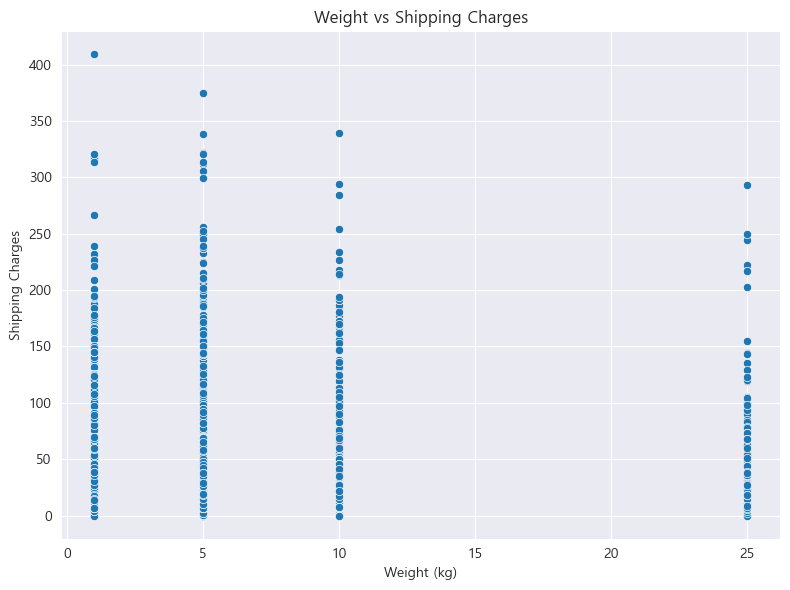

In [21]:
#   무게랑 배송비 비교 배송비가 넘 많은 경우 무게가 많이 들어서 비싼가?? 그럼 합리적인가? 보려고 - 선미
plt.figure(figsize=(8, 6))
sns.scatterplot(data=marketing_delivered, x='weight_kg', y='shipping_charges')
# 제목 및 축 레이블 추가 (선택사항)
plt.title('Weight vs Shipping Charges')
plt.xlabel('Weight (kg)')
plt.ylabel('Shipping Charges')

plt.tight_layout()
plt.savefig(os.path.join(save_dir, "weightvshippingcharges.png"), dpi=300)
plt.show()

In [22]:
# 크기, 부피 상위 90% 확인 대, 소형 구분을 위한
print(marketing_delivered['volume_cm3'].quantile([0.8, 0.9]))
print(marketing_delivered['weight_kg'].quantile([0.8, 0.9]))

0.8    172710.19
0.9    212427.42
Name: volume_cm3, dtype: float64
0.8     5.0
0.9    10.0
Name: weight_kg, dtype: float64


In [23]:
#할부가 0인 이상치 확인
zero_p = marketing_delivered[marketing_delivered['payment_installments'] == 0]

# 필요한 컬럼만 선택해서 출력
print(zero_p[['price', 'payment_type', 'payment_installments', 'order_status']])

### 결제방식별 0값 파악

zero_p = marketing_delivered[marketing_delivered['payment_installments'] == 0]
payment_type_counts = zero_p['payment_type'].value_counts()
print(payment_type_counts)

### 0인값 제품 카테고리 파악
zero_products = marketing_delivered[marketing_delivered['payment_installments'] == 0]['category1'].unique()
print(zero_products)

        price payment_type  payment_installments order_status
62759   39.53  credit_card                     0    delivered
100595  70.66  credit_card                     0    delivered
payment_type
credit_card    2
Name: count, dtype: int64
['스포츠용품' '식품']


In [24]:
#할부가 0인 이상치 1로 조정
marketing_delivered.loc[marketing_delivered['payment_installments'] == 0, 'payment_installments'] = 1

In [25]:
# 파생 변수 컬럼 만들기
marketing_delivered['total_price'] = marketing_delivered['price'] + marketing_delivered['shipping_charges']
marketing_delivered['density'] = marketing_delivered['weight_kg'] / (marketing_delivered['volume_cm3'] / 1000000)
marketing_delivered['delivery_total_days'] = (marketing_delivered['order_delivered_timestamp'] - marketing_delivered['order_purchase_timestamp']).dt.days
marketing_delivered['delay_rate'] = marketing_delivered['delivery_delay_days'] / marketing_delivered['delivery_total_days']

# inf나 NaN 처리
marketing_delivered['delay_rate'].replace([np.inf, -np.inf], np.nan, inplace=True)
marketing_delivered['delay_rate'].fillna(0, inplace=True)

marketing_delivered['is_big_product'] = (
    (marketing_delivered['volume_cm3'] > 212427) |
    (marketing_delivered['weight_kg'] > 10)
).astype(int) # 1이면 대형 물품, 0이면 소형

In [26]:
# Label encoding 변수 category
# category 타입을 item_cat으로 묶어 사용
marketing_delivered['item_cat'] = marketing_delivered['category1'] + '_' + marketing_delivered['category2']
# 카테고리
le = LabelEncoder()
marketing_delivered['item_cat_encoded'] = le.fit_transform(marketing_delivered['item_cat'])
# 카테고리 맵핑
category1_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(category1_mapping)

{'가구_1인가구': 0, '가구_거실장/테이블': 1, '가구_쇼파': 2, '가구_수납장/선반': 3, '가구_야외가구': 4, '가구_옷장/행거': 5, '가구_책상/책장': 6, '가구_침대': 7, '가구_화장대': 8, '스포츠용품_골프': 9, '스포츠용품_낚시': 10, '스포츠용품_등산': 11, '스포츠용품_캠핑': 12, '식품_가공식품': 13, '식품_건강식품': 14, '식품_신선식품': 15, '의류_남성의류': 16, '의류_스포츠의류': 17, '의류_여성의류': 18, '의류_유아의류': 19, '의류_파티의류': 20, '전자제품_건강가전': 21, '전자제품_냉장고': 22, '전자제품_비데': 23, '전자제품_세탁기/건조기': 24, '전자제품_음향가전': 25, '전자제품_주방가전': 26, '전자제품_청소기': 27, '화장품_남성화장품': 28, '화장품_네일케어': 29, '화장품_마스크/팩': 30, '화장품_메이크업': 31, '화장품_바디케어': 32, '화장품_선케어': 33, '화장품_스킨케어': 34, '화장품_향수': 35, '화장품_헤어케어': 36}


In [27]:
# 마케팅 y = 1 n = 0으로 변환
marketing_delivered['marketing_info_agree'] = marketing_delivered['marketing_info_agree'].map({'y': 1, 'n': 0})

In [28]:
# 왜도 완화 및 정규화/표준화
# log로 변환할 컬럼 목록
logs_cols = [
    'shipping_charges',
    'total_price',
    'approval_delay_minutes',
    'density',
    'delivery_total_days'
]
# log에서 std로 변환할 컬럼 목록
stdlog_cols = [
    'shipping_charges', # 로그 변환했어도 여전히 수치 차이 존재. 다른 변수와 영향력 맞추기 위해 표준화 필요
    'total_price', # 구매 금액은 수천~수십만 원까지 매우 큼. 정규화 없이 쓰면 거리 계산 시 이 값 하나가 군집을 결정해버림
    'approval_delay_minutes', # 분 단위 수천까지 존재 → 평균 0, 분산 1로 맞추지 않으면 전체 거리 구조 왜곡
    'density', # 단위가 복잡하고 수치 폭 넓음. 다른 변수들과 거리 계산 시 과대반영 방지
    'delivery_total_days' # delivery_delay_days와 비슷한 값임으로 음수 양수를 포함하고 있음.
]
# std로 변환할 컬럼 목록
std_cols = [
    'payment_installments', # 대부분 1, 일부 12개월 등 극단 값 존재. 표준화 없이 쓰면 비정상적으로 그룹 나뉠 수 있음
    'delivery_delay_days', # 음수~양수 포함. 중심을 0으로 두고 표준편차 맞추면 분포가 잘 반영됨
    'delay_rate',
    'item_cat_encoded',
    'marketing_info_agree',
    'is_big_product',
    'review_score',
    'price',
    'volume_cm3',
    'weight_kg',
    'age'
]

In [29]:
for col in logs_cols:
    marketing_delivered['log_' + col] = marketing_delivered[col].apply(
        lambda x: np.log1p(x) if x > -1 else 0  # 0 값으로 대체
)

scaler = StandardScaler()
for col in stdlog_cols:
    marketing_delivered['std_' + col] = scaler.fit_transform(marketing_delivered[['log_' + col]])
for col in std_cols:
    marketing_delivered['std_' + col] = scaler.fit_transform(marketing_delivered[[col]])

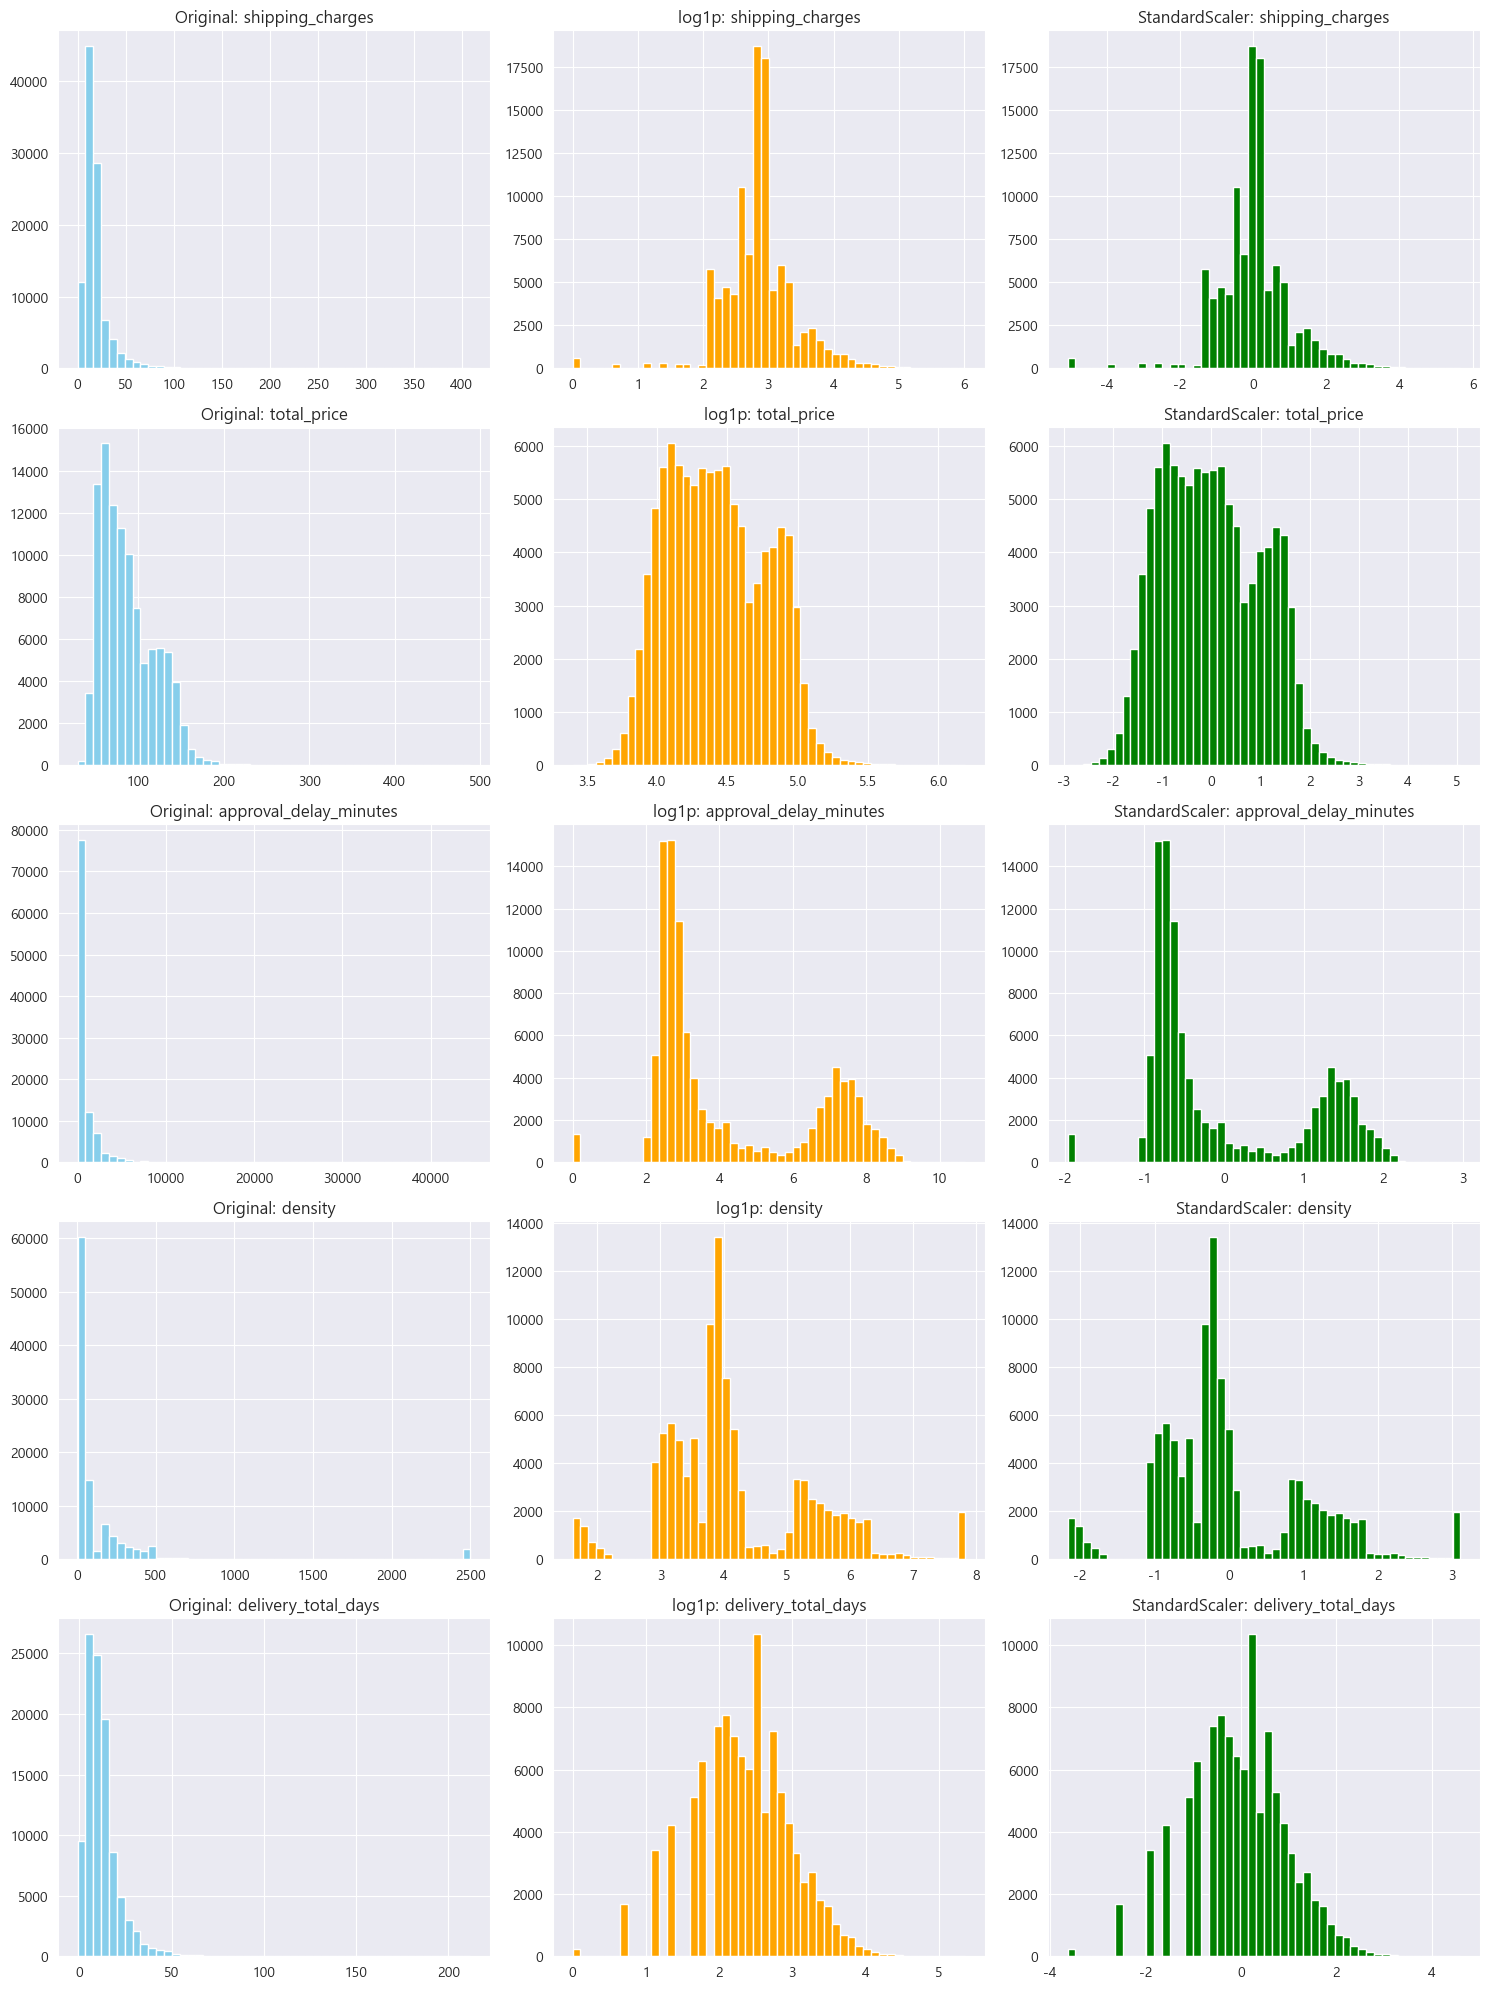

In [30]:
# 차트로 시각화 (로그 전/후, 표준화 전/후 비교)
# 표준화는 거리 기반 계산을 위한 스케일 통일 목적
fig, axes = plt.subplots(len(logs_cols), 3, figsize=(15, 4 * len(logs_cols)))

for i, col in enumerate(logs_cols):
    # 원본
    axes[i, 0].hist(marketing_delivered[col].dropna(), bins=50, color='skyblue')
    axes[i, 0].set_title(f"Original: {col}")

    # 로그 변환
    axes[i, 1].hist(marketing_delivered['log_' + col].dropna(), bins=50, color='orange')
    axes[i, 1].set_title(f"log1p: {col}")

    # 표준화
    if col in stdlog_cols:
        axes[i, 2].hist(marketing_delivered['std_' + col].dropna(), bins=50, color='green')
        axes[i, 2].set_title(f"StandardScaler: {col}")
    else:
        axes[i, 2].axis('off')

plt.tight_layout()
plt.savefig(os.path.join(save_dir, "orilogstd.png"), dpi=300)
plt.show()

In [31]:
marketing_delivered.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_timestamp', 'order_estimated_delivery_date', 'age', 'gender', 'country', 'payment_type', 'payment_installments', 'seller_id', 'shipping_charges', 'category1', 'category2', 'price', 'delivery_delay_days', 'approval_delay_minutes', 'weight_kg', 'volume_cm3', 'review_score', 'marketing_info_agree', 'agegroup', 'product_id', 'total_price', 'density', 'delivery_total_days', 'delay_rate', 'is_big_product', 'item_cat', 'item_cat_encoded', 'log_shipping_charges', 'log_total_price', 'log_approval_delay_minutes', 'log_density', 'log_delivery_total_days', 'std_shipping_charges', 'std_total_price', 'std_approval_delay_minutes', 'std_density', 'std_delivery_total_days', 'std_payment_installments', 'std_delivery_delay_days', 'std_delay_rate', 'std_item_cat_encoded', 'std_marketing_info_agree', 'std_is_big_product', 'std_review_score', 'std_price', 'std_volume_cm3', 'std_weight_kg',
   

In [32]:
df_mixed = marketing_delivered[[
    'std_total_price',
    'std_shipping_charges',
    'std_price',
    'std_volume_cm3',
    'std_weight_kg',
    'std_density'
]]

In [33]:
# 히트맵을 위한 필요한 컬럼만 추출
selected_cols = [
    'order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_timestamp', 'order_estimated_delivery_date', 'age', 'gender', 'country', 'payment_type', 'payment_installments', 'seller_id', 'shipping_charges', 'category1', 'category2', 'price', 'delivery_delay_days', 'approval_delay_minutes', 'weight_kg', 'volume_cm3', 'review_score', 'marketing_info_agree', 'agegroup', 'product_id'
]

# 선택된 열만 추출
df_selected = marketing_delivered[selected_cols].copy()

# Label Encoding
label_enc = LabelEncoder()
for col in df_selected.columns:
    if df_selected[col].dtype == 'object' or str(df_selected[col].dtype).startswith('category'):
        df_selected[col] = label_enc.fit_transform(df_selected[col].astype(str))

In [34]:
# 문자열 타입 컬럼 제거하고 상관계수 계산
numeric_df = df_selected.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# 0.5 초과이고 1.0 미만인 조합 추출
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if 0.5 <= abs(corr_val) < 0.99:
            high_corr.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_val
            ))

# 결과 출력
high_corr_df = pd.DataFrame(high_corr, columns=['Feature 1', 'Feature 2', 'Correlation'])
display(high_corr_df.sort_values(by='Correlation', ascending=False))

,Feature 1,Feature 2,Correlation
0,age,agegroup,0.966945
2,price,volume_cm3,0.625053
1,payment_type,approval_delay_minutes,0.528885


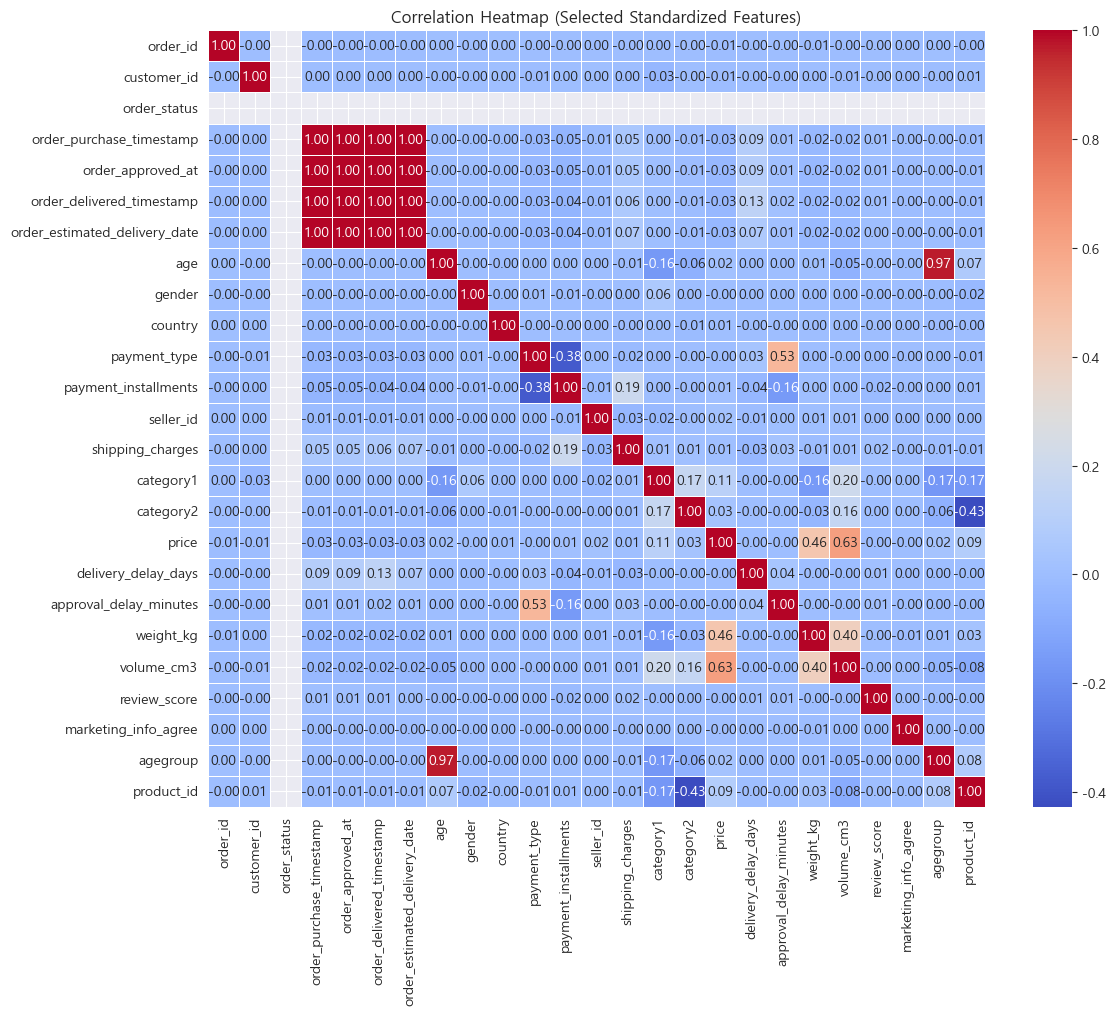

In [35]:
# 선택한 컬럼만 추출
df_corr = df_selected[selected_cols]

# 상관관계 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap (Selected Standardized Features)")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "heatmapmix.png"), dpi=300)
plt.show()

In [36]:
def plot_cluster_bar_ratio(df, column, cluster_col, order=None):

    count_df = df.groupby([cluster_col, column]).size().reset_index(name='count')
    count_df['percentage'] = count_df['count'] / count_df.groupby(cluster_col)['count'].transform('sum') * 100

    # 시각화
    plt.figure(figsize=(10, 6))
    sns.barplot(data=count_df, x=column, y='percentage', hue=cluster_col, order=order, palette='Set2')
    plt.title(f'클러스터별 {column} 분포 (비율 %)')
    plt.xlabel(column)
    plt.ylabel('비율 (%)')
    plt.legend(title='클러스터')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{cluster_col}{column}ratio.png"), dpi=300)
    plt.show()

# 4 혼합 클러스터

In [37]:
df_mixed.isnull().sum()

std_total_price         0
std_shipping_charges    0
std_price               0
std_volume_cm3          0
std_weight_kg           0
std_density             0
dtype: int64

In [38]:
df_mixed = df_mixed[[
    'std_total_price',
    'std_shipping_charges',
    'std_price',
    'std_volume_cm3',
    'std_weight_kg',
    'std_density'
]]

In [39]:
df_mixed.describe()

,std_total_price,std_shipping_charges,std_price,std_volume_cm3,std_weight_kg,std_density
count,1.026160e+05,1.026160e+05,1.026160e+05,1.026160e+05,1.026160e+05,1.026160e+05
mean,-9.495969e-16,3.656024e-17,4.010548e-16,9.527820e-17,-1.081574e-16,-4.201658e-16
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-2.923603e+00,-5.076992e+00,-1.432850e+00,-1.144434e+00,-8.671590e-01,-2.166835e+00
25%,-8.221641e-01,-4.969887e-01,-8.485258e-01,-8.122244e-01,-8.671590e-01,-6.540606e-01
50%,-7.624232e-02,-1.797340e-02,-2.873222e-01,-4.034806e-01,-3.857445e-02,-1.960734e-01
75%,8.069541e-01,3.593426e-01,5.264581e-01,5.575737e-01,-3.857445e-02,7.961325e-01
max,5.063717e+00,5.665528e+00,2.729235e+00,5.472613e+00,4.104348e+00,3.107232e+00


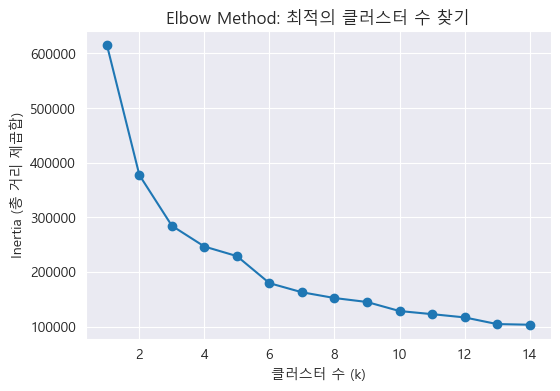

In [40]:
# Elbow Method: 최적의 클러스터 수 찾기
inertia = []
K_range = range(1, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_mixed)
    inertia.append(kmeans.inertia_)

# Elbow 시각화
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method: 최적의 클러스터 수 찾기")
plt.xlabel("클러스터 수 (k)")
plt.ylabel("Inertia (총 거리 제곱합)")
plt.grid(True)
plt.savefig(os.path.join(save_dir, f"4cluelbow"), dpi=300)
plt.show()

In [ ]:
# Silhouette Score 계산 및 시각화
scores = []
k_range = range(2, 9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(df_mixed)
    score = silhouette_score(df_mixed, labels)
    scores.append(score)

# 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, marker='o')
plt.title("Silhouette Score: 최적의 클러스터 수 찾기")
plt.xlabel("클러스터 수 (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.xticks(k_range)
plt.savefig(os.path.join(save_dir, f"4clusilhouette"), dpi=300)
plt.show()

In [41]:
# 고객 세그멘테이션 (KMeans 클러스터링)
kmeans = KMeans(n_clusters=3, random_state=42)
df_mixed.loc[:, 'Cluster'] = kmeans.fit_predict(df_mixed)

In [42]:
# 군집별 샘플 수
df_mixed['Cluster'].value_counts().sort_index()

Cluster
0    50935
1    26144
2    25537
Name: count, dtype: int64

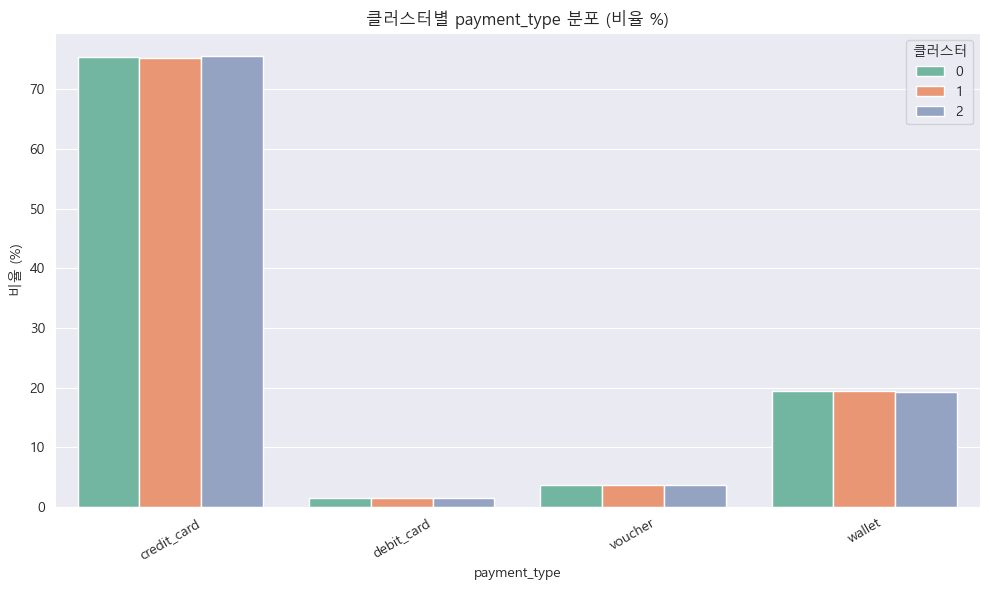

In [45]:
# 변수별 시각화
marketing_delivered['cluster'] = df_mixed['Cluster'].values
plot_cluster_bar_ratio(marketing_delivered, 'payment_type', 'cluster')

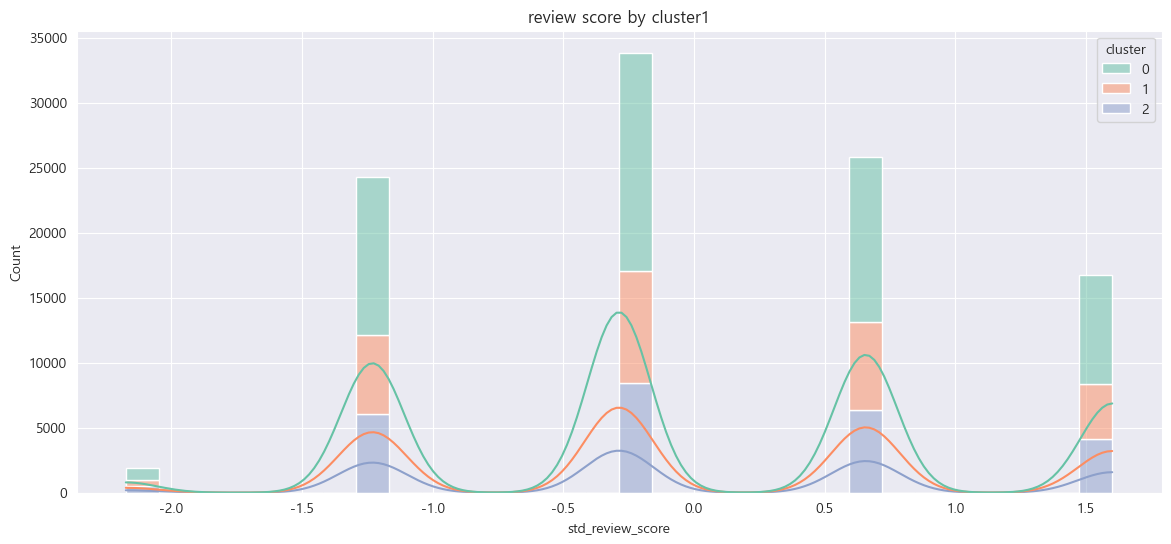

In [46]:
plt.figure(figsize=(14,6))
sns.histplot(data= marketing_delivered, x= 'std_review_score', hue='cluster', bins=30, kde=True, palette='Set2', multiple='stack')
plt.title('review score by cluster1')
plt.show()

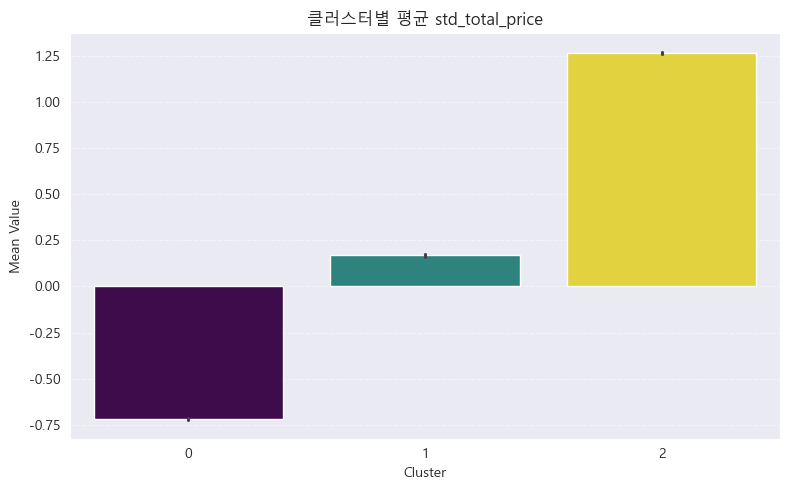

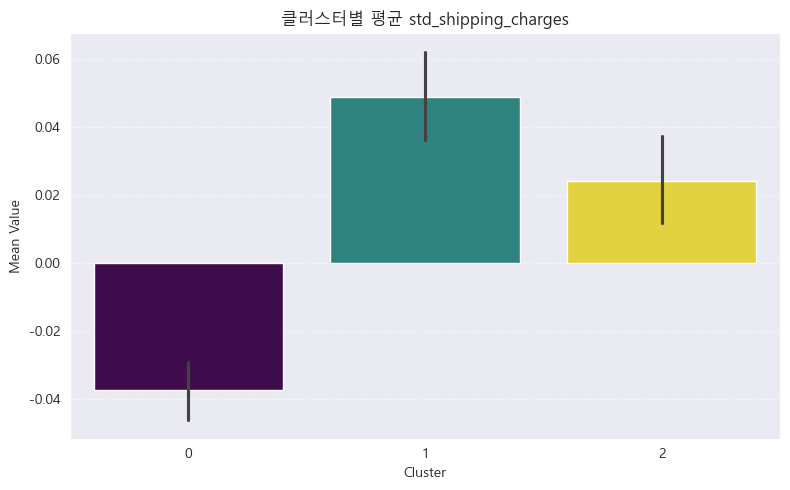

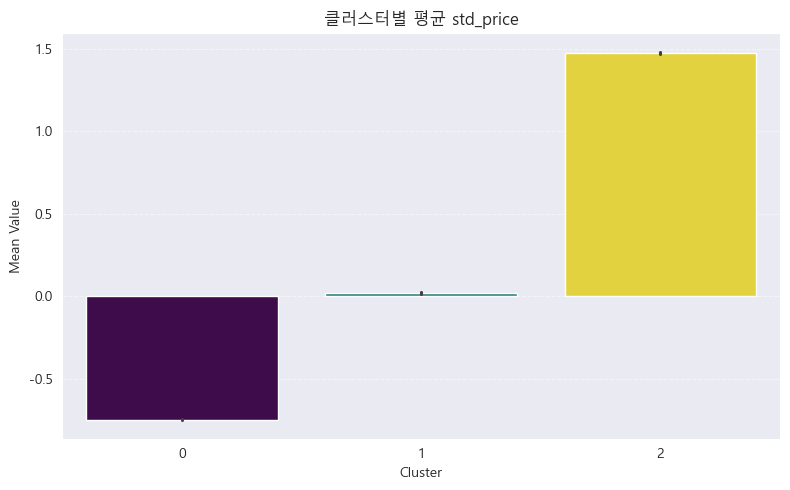

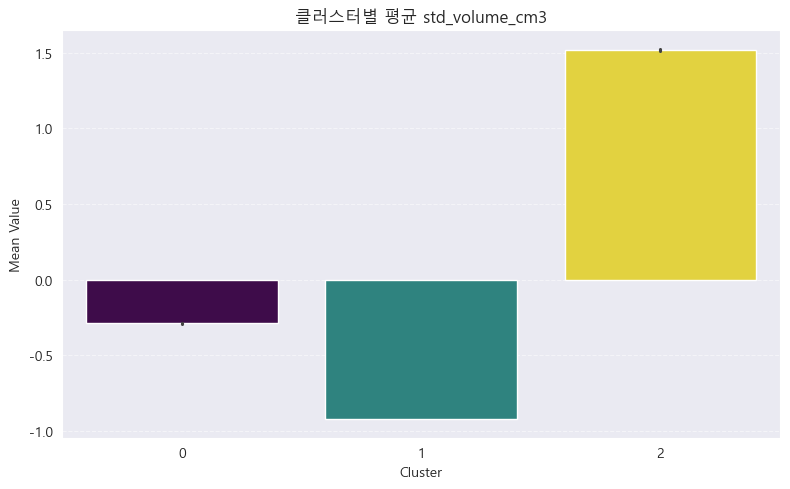

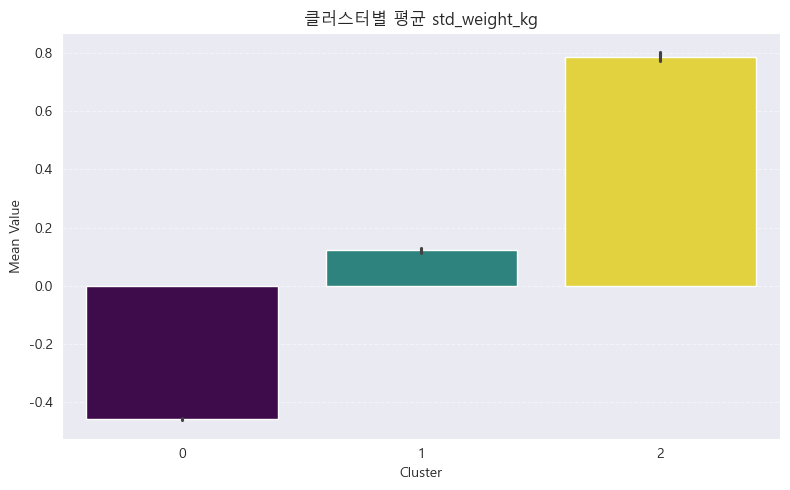

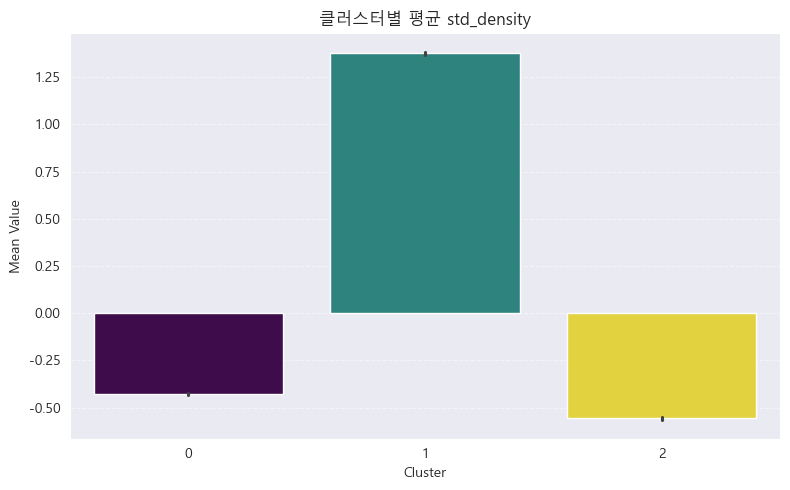

In [47]:
# 클러스터별 평균값 바 차트 시각화
# 클러스터 컬럼이 있는 경우, 그 외 수치형 컬럼만 선택
numeric_cols = df_mixed.select_dtypes(include='number').drop(columns='Cluster', errors='ignore').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_mixed, x='Cluster', y=col, hue='Cluster', palette='viridis', legend=False)
    plt.title(f'클러스터별 평균 {col}')
    plt.xlabel('Cluster')
    plt.ylabel('Mean Value')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"4clu{col}bar"), dpi=300)
    plt.show()

In [48]:
# 군집별 평균 값보기
cluster_profile = df_mixed.groupby('Cluster').mean().round(2)
print(cluster_profile)

         std_total_price  std_shipping_charges  std_price  std_volume_cm3  std_weight_kg  std_density
Cluster                                                                                              
0                  -0.72                 -0.04      -0.75           -0.29          -0.46        -0.43
1                   0.17                  0.05       0.02           -0.92           0.12         1.38
2                   1.27                  0.02       1.48            1.52           0.79        -0.56


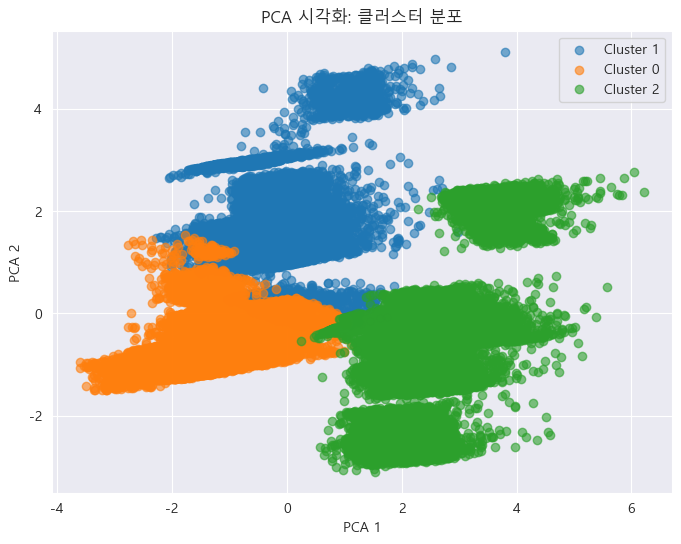

In [49]:
# 2D 시각화를 위한 차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_mixed.drop('Cluster', axis=1))

df_mixed.loc[:, 'pca1'] = pca_result[:, 0]
df_mixed.loc[:, 'pca2'] = pca_result[:, 1]

# 산점도 시각화
plt.figure(figsize=(8, 6))
for cluster_id in df_mixed['Cluster'].unique():
    subset = df_mixed[df_mixed['Cluster'] == cluster_id]
    plt.scatter(subset['pca1'], subset['pca2'], label=f'Cluster {cluster_id}', alpha=0.6)
plt.legend()
plt.title('PCA 시각화: 클러스터 분포')
plt.legend(loc='upper right')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.savefig(os.path.join(save_dir, f"4clukmean"), dpi=300)
plt.show()

In [50]:
# 혹시라도 PCA 전에 cluster 컬럼이 있었는지
print(df_mixed.columns)

# 혹시 log나 std 하기 전 원본 컬럼이 섞여 있었는지
# 예: total_price, density, shipping_charges 등

# PCA 2 방향의 원인 추정
# PCA 수행에 사용한 실제 컬럼 (예: 클러스터, pca1, pca2, 등 제외)
pca_input_cols = [
    'std_total_price',
    'std_price',
    'std_shipping_charges',
    'std_payment_installments',
    'std_delivery_delay_days',
    'std_delivery_total_days'
]

# PCA components 해석
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PCA1', 'PCA2'],
                        index=pca_input_cols)

print(loadings.sort_values('PCA2', ascending=False).head())

Index(['std_total_price', 'std_shipping_charges', 'std_price', 'std_volume_cm3', 'std_weight_kg', 'std_density', 'Cluster', 'pca1', 'pca2'], dtype='object')
                             PCA1      PCA2
std_delivery_total_days -0.039236  0.808588
std_delivery_delay_days  0.379584  0.436920
std_total_price          0.550510  0.069819
std_price                0.130572  0.042132
std_shipping_charges     0.559840  0.005538


In [51]:
print(pca.explained_variance_ratio_)

[0.45257442 0.24042258]


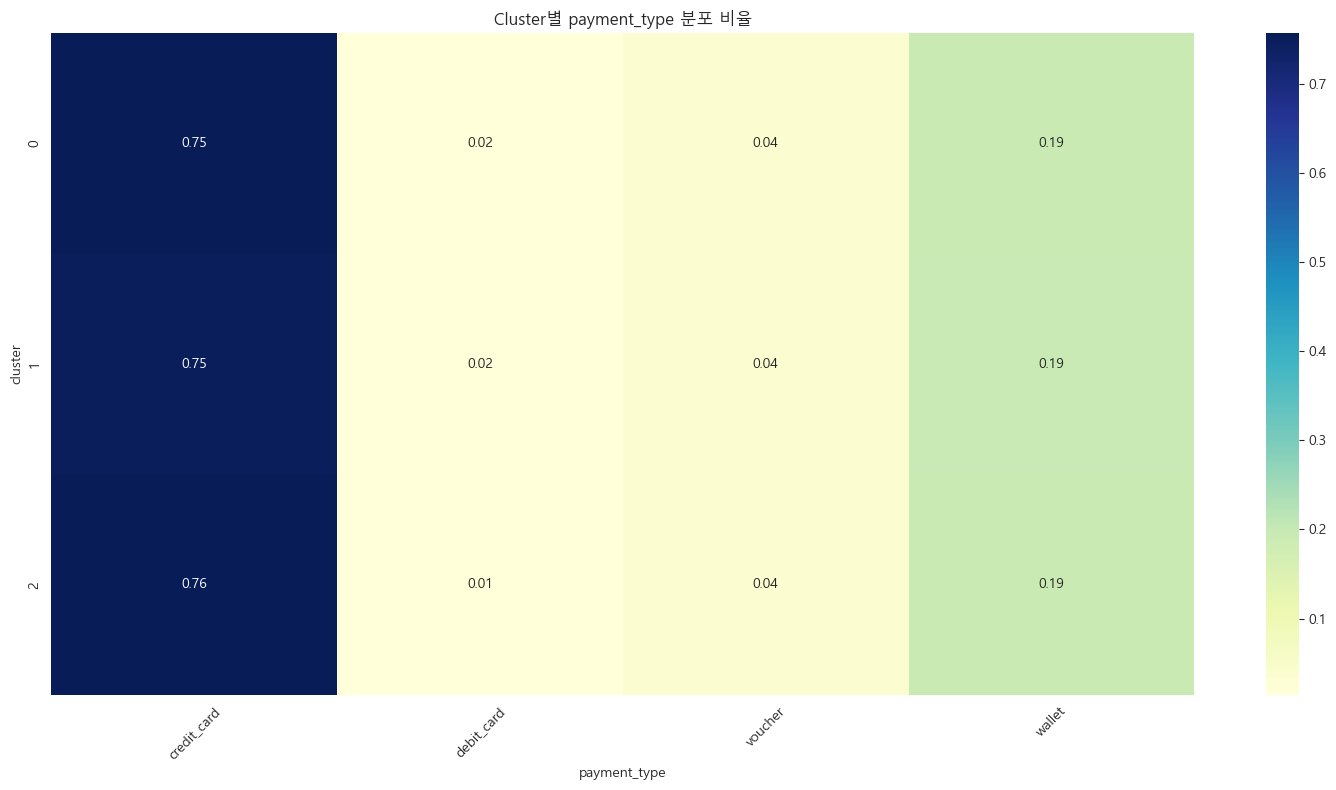

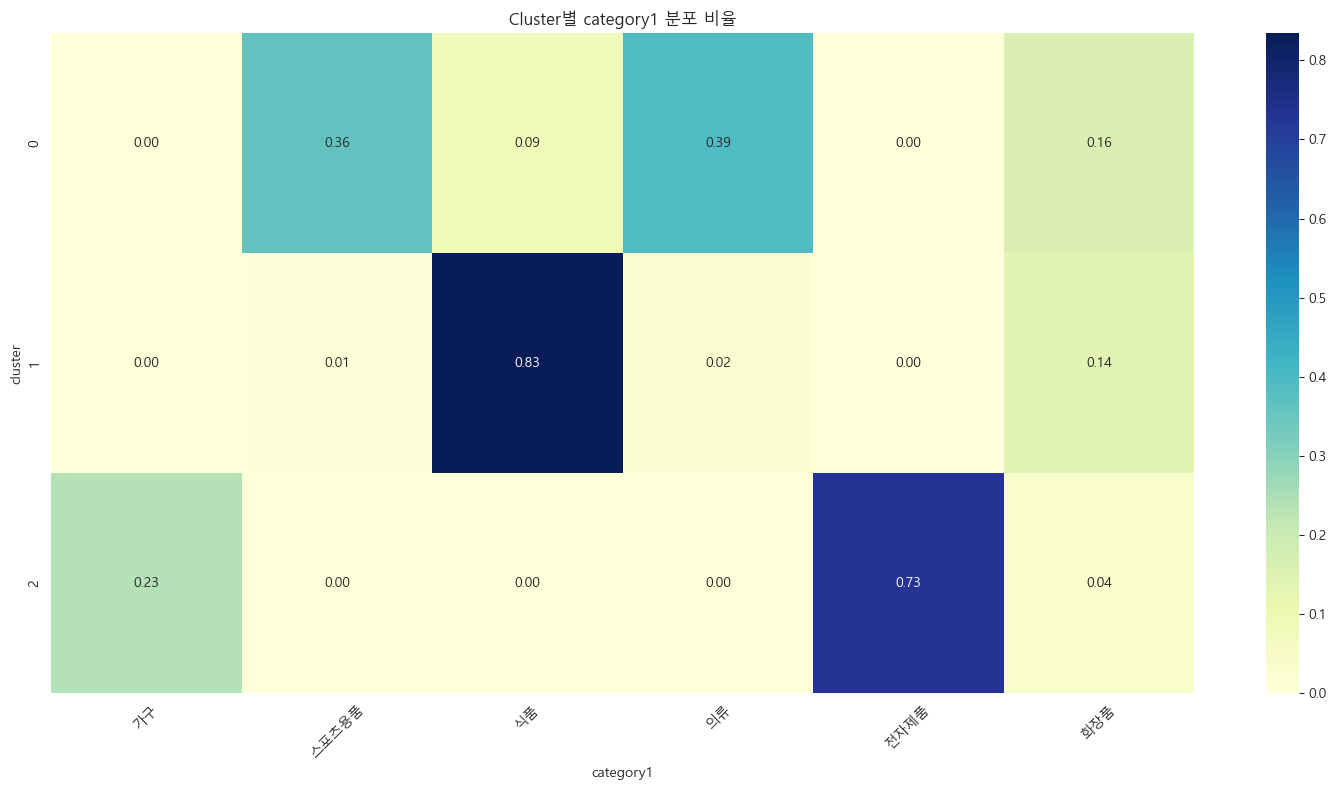

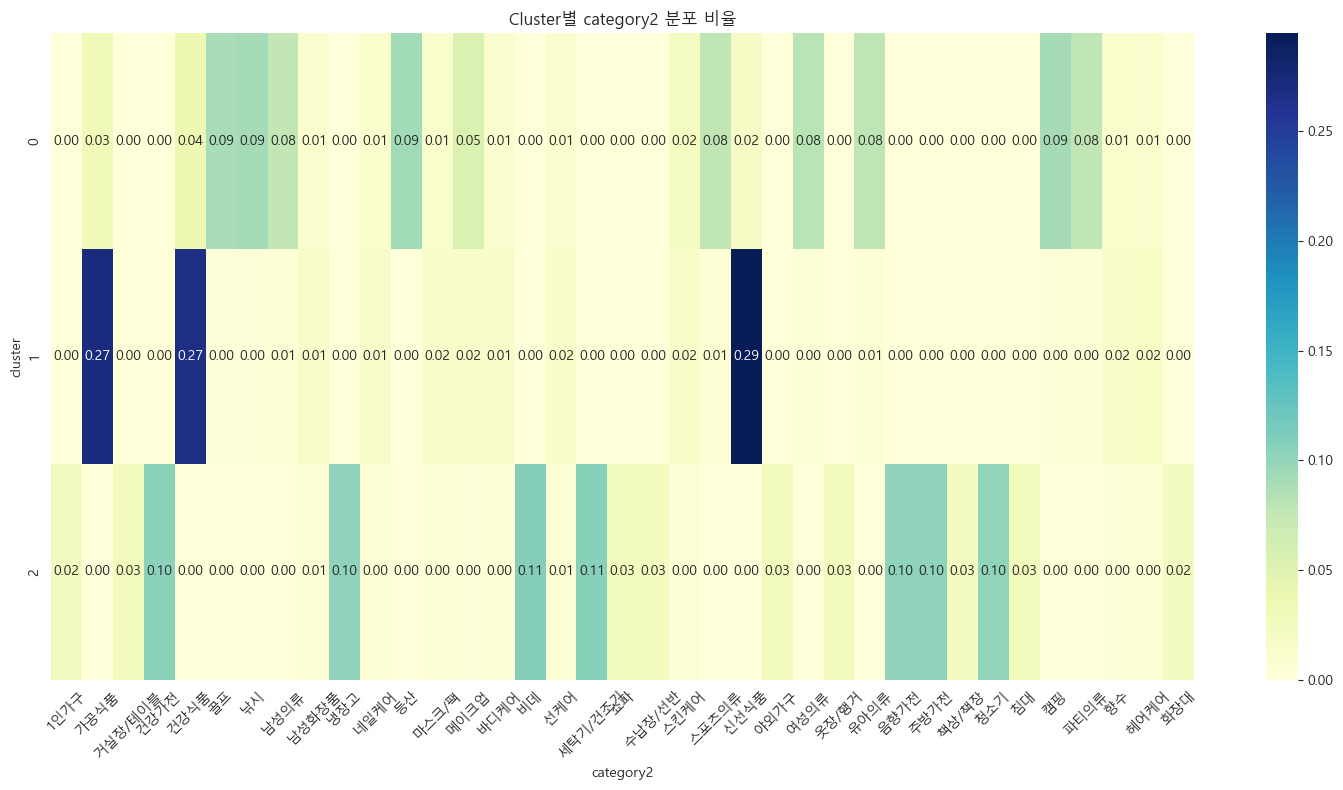

In [53]:
# 클러스터 라벨 붙여진 df_mixed 기준으로 병합
df_merged = marketing_delivered.copy()
df_merged['cluster'] = df_mixed['Cluster'].values
marketing_delivered['cluster4'] = df_mixed['Cluster'].values

cols = [
    'payment_type', 'category1', 'category2'
]

for col in cols:
    ct = pd.crosstab(df_merged['cluster'], df_merged[col], normalize='index')
    plt.figure(figsize=(15, 8))
    sns.heatmap(ct, annot=True, fmt=".2f", cmap='YlGnBu')
    plt.title(f'Cluster별 {col} 분포 비율')
    plt.ylabel('cluster')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"4clu{col}heat"), dpi=300)
    plt.show()

# for col in cols:
#    ct = pd.crosstab(df_merged['cluster'], df_merged[col])
#    plt.figure(figsize=(15, 8))
#    sns.heatmap(ct, annot=True, fmt="d", cmap='Oranges')
#    plt.title(f'[절대값] Cluster별 {col} 분포')
#    plt.ylabel('cluster')
#    plt.xlabel(col)
#    plt.xticks(rotation=45)
#    plt.tight_layout()
#    plt.show()

In [54]:
# LTV란?
# LTV (Customer Lifetime Value, 고객 생애 가치) : 한 고객이 우리와 거래하면서 예상되는 총 수익

ltv_df = df_merged.groupby('cluster').agg(
    total_ltv=('total_price', 'sum'),  # 총 구매 금액
    avg_ltv=('total_price', 'mean'),   # 구매 1건당 평균 금액
    purchase_count=('order_id', 'count'),  # 총 구매건수
    unique_customers=('customer_id', 'nunique')  # 고객 수
).reset_index()

# 고객당 평균 LTV 및 재구매율
ltv_df['ltv_per_customer'] = ltv_df['total_ltv'] / ltv_df['unique_customers']
ltv_df['repurchase_rate'] = ltv_df['purchase_count'] / ltv_df['unique_customers']

ltv_df


,cluster,total_ltv,avg_ltv,purchase_count,unique_customers,ltv_per_customer,repurchase_rate
0,0,3330495.82,65.387176,50935,47690,69.836356,1.068044
1,1,2324616.09,88.915854,26144,24908,93.328091,1.049623
2,2,3327327.99,130.294396,25537,24361,136.584212,1.048274


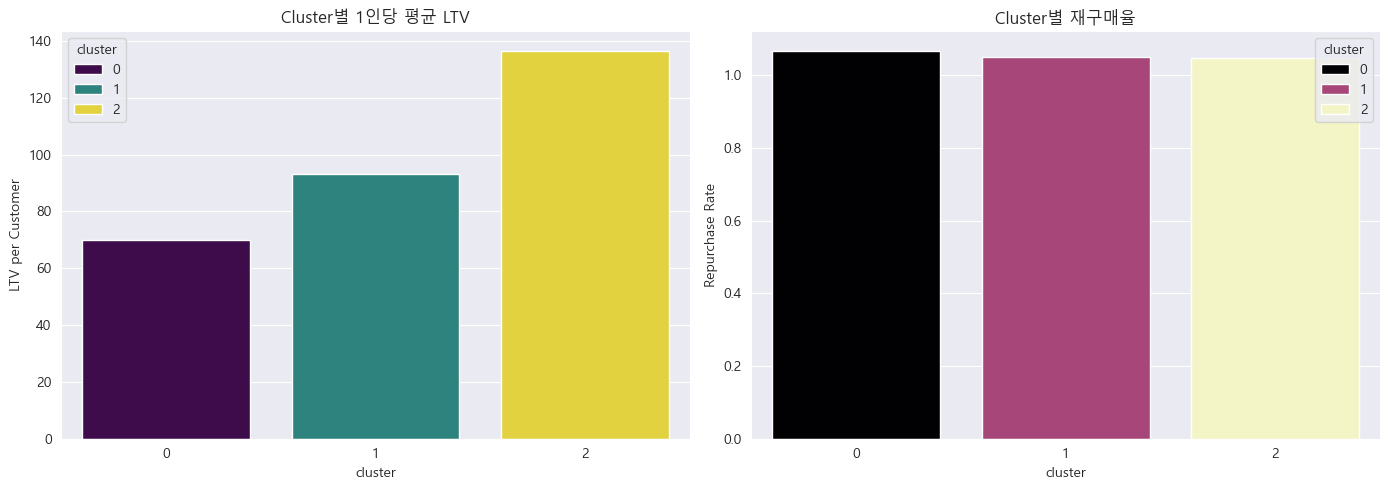

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LTV per customer 시각화
sns.barplot(data=ltv_df, x='cluster', y='ltv_per_customer', hue='cluster', ax=axes[0], palette='viridis')
axes[0].set_title('Cluster별 1인당 평균 LTV')
axes[0].set_ylabel('LTV per Customer')
axes[0].set_xlabel('cluster')

# 재구매율 시각화
sns.barplot(data=ltv_df, x='cluster', y='repurchase_rate', hue='cluster', ax=axes[1], palette='magma')
axes[1].set_title('Cluster별 재구매율')
axes[1].set_ylabel('Repurchase Rate')
axes[1].set_xlabel('cluster')

plt.tight_layout()
plt.savefig(os.path.join(save_dir, f"4clultv"), dpi=300)
plt.show()